In [355]:
from dataset_generator import dataset_generator
from Model import Model
import warnings
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
warnings.filterwarnings("ignore")

# Generate data and scale it

In [2]:
#geneate data
train_set = dataset_generator(10000)
validation_set = dataset_generator(30)

In [3]:
#to numpy array
x_train = np.array(train_set[0])
y_train = np.array(train_set[1])
x_validation = np.array(validation_set[0])
y_validation = np.array(validation_set[1])

In [266]:
#scale y values between 0 and 1
scaler = MinMaxScaler()
scaled_y_train= scaler.fit_transform(y_train.reshape(10000,8))
scaled_y_validation = scaler.fit_transform(y_validation.reshape(30,8))

In [269]:
#final shapes of training set
print(x_train.shape)
print(scaled_y_train.shape)

(10000, 600, 400, 3)
(10000, 8)


# Training

Epoch 1: val_cost [ 0.03442316  0.03351654  0.03467401  0.03308777  0.02715906  0.03534101
  0.04055854  0.03537848]
Epoch 1: val_cost [ 0.01571532  0.01271538  0.00982393  0.01261086  0.01511375  0.01144419
  0.01578593  0.02039   ]
Epoch 1: val_cost [ 0.01230022  0.01340971  0.00606722  0.0125832   0.00714747  0.00741613
  0.01056393  0.01080979]
Epoch 2: val_cost [ 0.00929556  0.01244404  0.00752569  0.00737229  0.00838479  0.00443697
  0.01052363  0.01083957]
Epoch 2: val_cost [ 0.00934459  0.01120646  0.00545501  0.00869171  0.00765698  0.00379627
  0.00914336  0.00971111]
Epoch 2: val_cost [ 0.01073836  0.01212353  0.00567058  0.00630152  0.00738175  0.00443793
  0.00629566  0.00914956]
Epoch 3: val_cost [ 0.01209225  0.00974862  0.00548064  0.00860555  0.00727154  0.00515813
  0.00500217  0.01006729]
Epoch 3: val_cost [ 0.01128414  0.01111606  0.00523013  0.00604964  0.00697929  0.00709951
  0.00539148  0.00778231]
Epoch 3: val_cost [ 0.0097263   0.01151559  0.00487832  0.006927

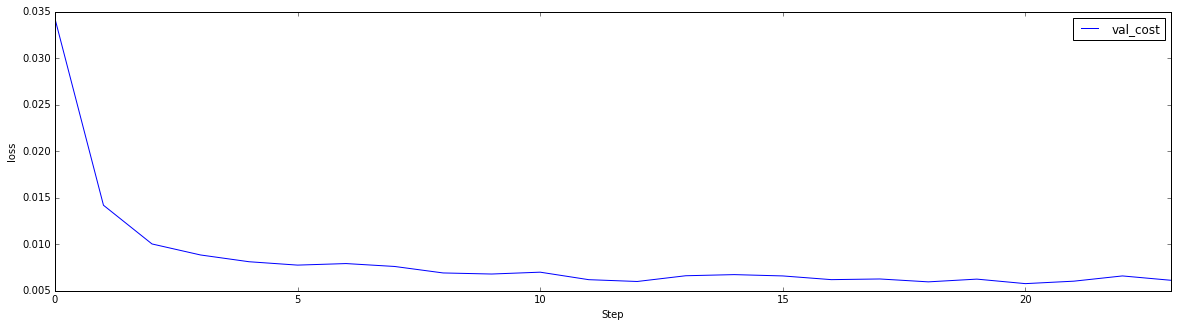

CPU times: user 9h 52s, sys: 1h 26min 24s, total: 10h 27min 17s
Wall time: 4h 31min 55s


In [320]:
%%time
model = Model()
model.train(x_train,x_validation, scaled_y_train, scaled_y_validation, learning_rate = 0.001, num_epochs = 8, minibatch_size = 30)

## Prediction

In [353]:
#prediction on validation set
prediction = model.predict(x_validation)
prediction = scaler.inverse_transform(prediction)
for i in prediction[:3]:
    print("Predicted deformation values: {}".format([round(j, 0) for j in i]))

Predicted deformation values: [38.0, 30.0, 349.0, 90.0, 352.0, 517.0, 19.0, 506.0]
Predicted deformation values: [24.0, 36.0, 357.0, 27.0, 367.0, 568.0, 68.0, 489.0]
Predicted deformation values: [53.0, 48.0, 378.0, 26.0, 342.0, 541.0, 45.0, 544.0]


In [354]:
#actual values on validation set
actual = np.array(y_validation).reshape(30,8)[:3]
for i in actual[:3]:
    print("Actual deformation values: {}".format([round(j, 0) for j in i]))

Actual deformation values: [41.0, 31.0, 354.0, 96.0, 351.0, 513.0, 11.0, 504.0]
Actual deformation values: [18.0, 38.0, 356.0, 11.0, 368.0, 582.0, 72.0, 485.0]
Actual deformation values: [55.0, 33.0, 386.0, 16.0, 337.0, 554.0, 40.0, 539.0]


In [334]:
# mean error on validation set (result in pixels)
errors = [abs(pred-actu) for pred, actu in zip(prediction, actual)]
error_mean = np.mean(errors)
print(error_mean)

5.80407196661


# Visualization (using results from "Prediction" section)

#### Initial images

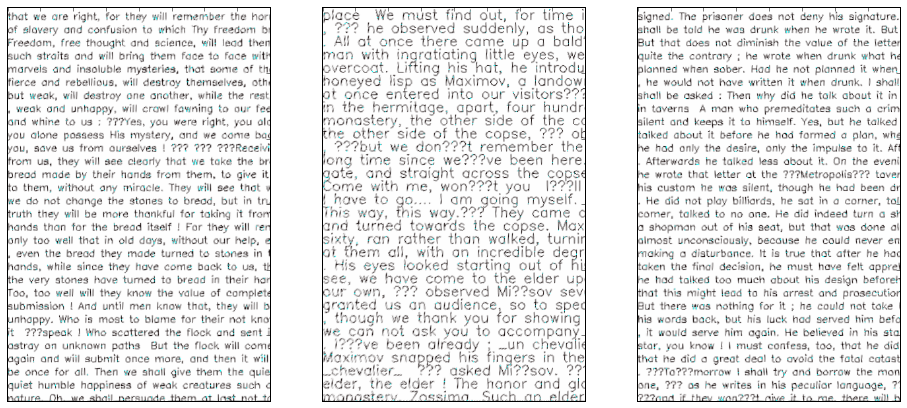

In [335]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    pts_src = new_y_validation[i].reshape((4,2)) #actual values on val.set
    pts_dst = np.array([[0, 0], [400, 0], [400, 600],[0, 600]])
    h, status = cv2.findHomography(pts_src, pts_dst)
    vis_img = cv2.warpPerspective(x_validation[i], h, (x_validation[i].shape[1],x_validation[i].shape[0]))
    
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(vis_img)

#### Deformed images

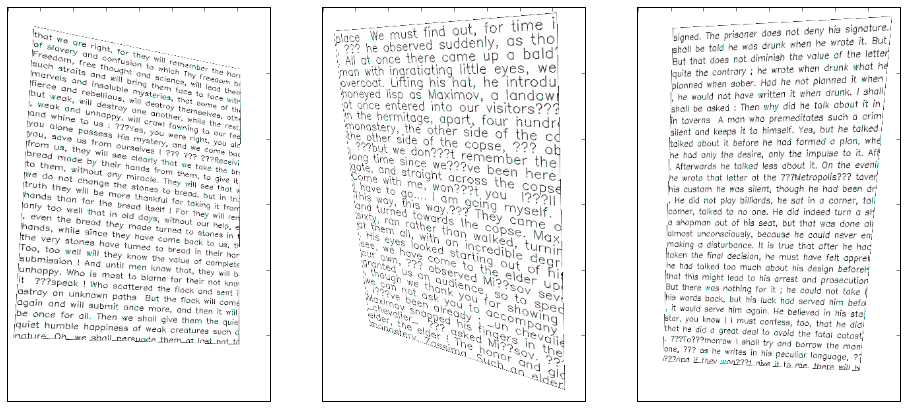

In [336]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(x_validation[i]) 

#### Restored images

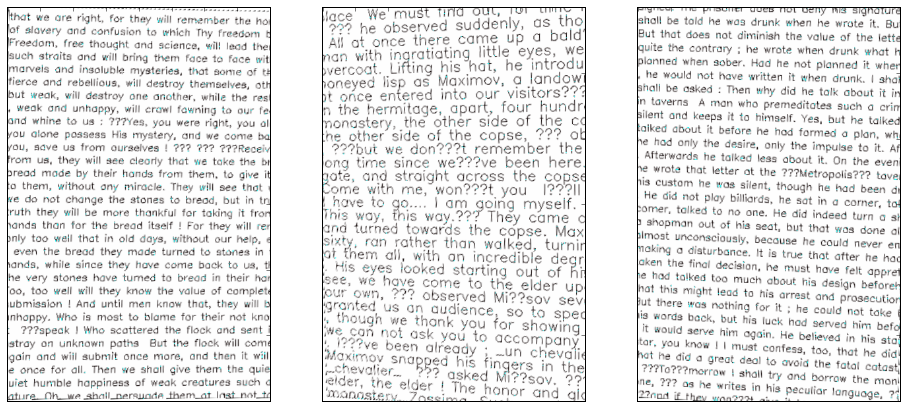

In [337]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    pts_src = prediction[i].reshape((4,2))#predictions on val. set using CNN
    pts_dst = np.array([[0, 0], [400, 0], [400, 600],[0, 600]])
    h, status = cv2.findHomography(pts_src, pts_dst)
    vis_img = cv2.warpPerspective(x_validation[i], h, (x_validation[i].shape[1],x_validation[i].shape[0]))
    
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(vis_img)